HOUSE PRICING MODEL

1) Import Libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle 

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

2) Load Dataset

In [3]:
df = pd.read_csv("house_price_prediction_ML.csv")
df.head()

,Area_sqft,Bedrooms,Bathrooms,Floors,Age_of_House,Garage,Location_Score,Price
0,1360,5,3,3,26,1,9,11312334
1,4272,2,1,1,21,0,6,15604278
2,3592,3,3,3,16,2,9,17113836
3,966,1,3,2,26,0,5,6975217
4,4926,2,3,1,28,0,1,16558138


In [4]:
df.tail()

,Area_sqft,Bedrooms,Bathrooms,Floors,Age_of_House,Garage,Location_Score,Price
9995,2837,2,3,1,28,0,9,14443676
9996,1791,1,1,1,9,0,2,6734992
9997,2698,2,2,2,6,1,5,11421032
9998,1900,2,1,1,17,1,2,6888427
9999,3155,3,1,1,19,1,5,13733735


In [5]:
df.shape

(10000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Area_sqft       10000 non-null  int64
 1   Bedrooms        10000 non-null  int64
 2   Bathrooms       10000 non-null  int64
 3   Floors          10000 non-null  int64
 4   Age_of_House    10000 non-null  int64
 5   Garage          10000 non-null  int64
 6   Location_Score  10000 non-null  int64
 7   Price           10000 non-null  int64
dtypes: int64(8)
memory usage: 625.1 KB


In [7]:
df.describe()

,Area_sqft,Bedrooms,Bathrooms,Floors,Age_of_House,Garage,Location_Score,Price
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,2756.729500,2.983900,2.505500,2.00170,14.674800,1.005300,5.024500,1.293165e+07
std,1292.352479,1.413308,1.127252,0.81949,8.727019,0.815683,2.574522,4.098322e+06
min,501.000000,1.000000,1.000000,1.00000,0.000000,0.000000,1.000000,3.026652e+06
25%,1624.000000,2.000000,1.000000,1.00000,7.000000,0.000000,3.000000,9.624321e+06
50%,2772.500000,3.000000,3.000000,2.00000,15.000000,1.000000,5.000000,1.295325e+07
75%,3873.000000,4.000000,4.000000,3.00000,22.000000,2.000000,7.000000,1.625145e+07
max,4999.000000,5.000000,4.000000,3.00000,29.000000,2.000000,9.000000,2.304416e+07


3) Check Missing Values

In [8]:
df.isnull().sum()

Area_sqft         0
Bedrooms          0
Bathrooms         0
Floors            0
Age_of_House      0
Garage            0
Location_Score    0
Price             0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

4) Correlation Heatmap (EDA)

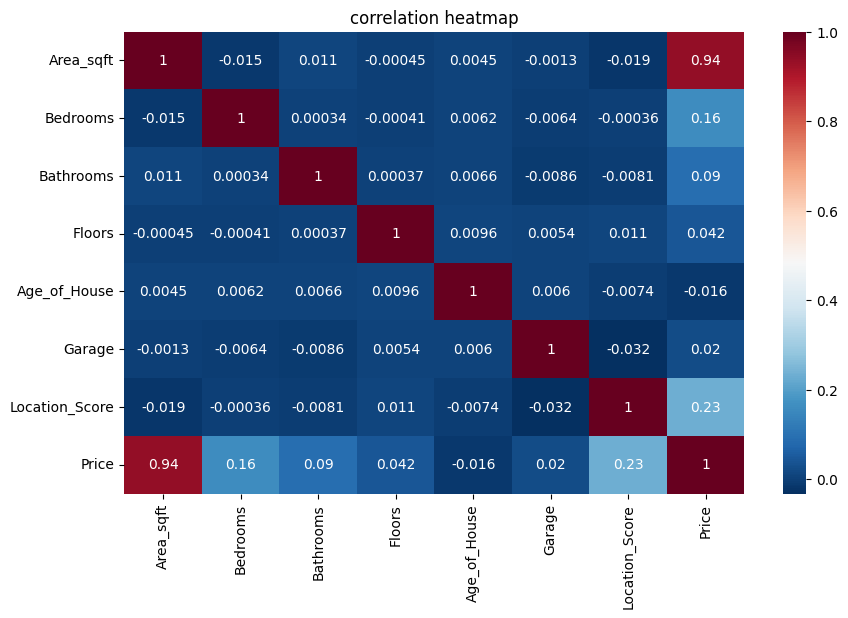

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="RdBu_r")
plt.title("correlation heatmap")
plt.show()

In [11]:
df.columns

Index(['Area_sqft', 'Bedrooms', 'Bathrooms', 'Floors', 'Age_of_House',
       'Garage', 'Location_Score', 'Price'],
      dtype='object')

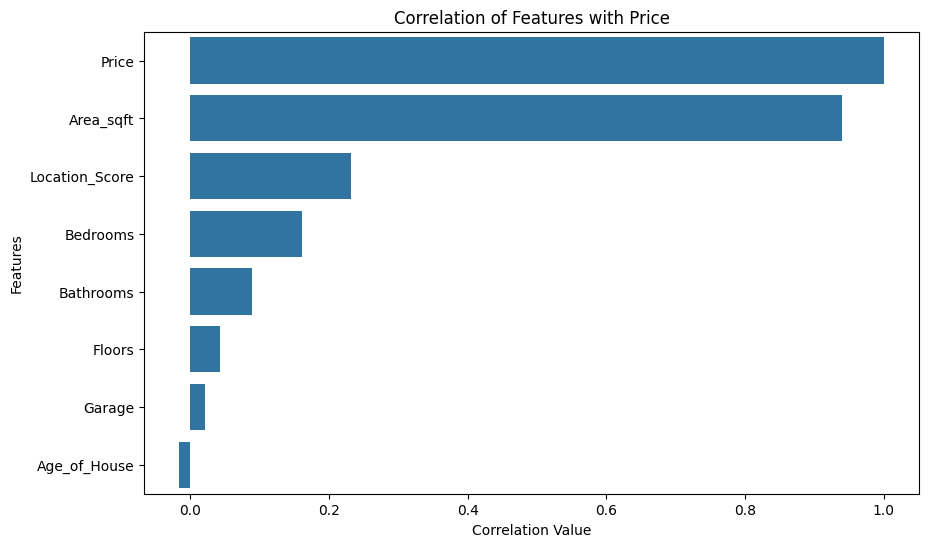

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
corr = df.select_dtypes(include=np.number).corr()["Price"].sort_values(ascending=False)
sns.barplot(x=corr.values, y=corr.index)
plt.title("Correlation of Features with Price")
plt.xlabel("Correlation Value")
plt.ylabel("Features")
plt.show()

In [13]:
x =  df.drop("Price", axis=1)
y = df["Price"]

6) Train-Test Split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

Model Training

In [15]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

Create Model Dictionary

In [16]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100, random_state=42), 
    "SVR": SVR(),
    "KNN": KNeighborsRegressor()             
}

Train + Evaluate All Models

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

results = []

for name, model in models.items():
    
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    
    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R2 Score": r2
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="R2 Score", ascending=False)

print(results_df)

               Model           MAE          RMSE  R2 Score
1              Ridge  3.998369e+05  5.020290e+05  0.984867
2              Lasso  3.998392e+05  5.020311e+05  0.984867
0  Linear Regression  3.998392e+05  5.020312e+05  0.984867
5  Gradient Boosting  4.239772e+05  5.282364e+05  0.983246
4      Random Forest  4.733203e+05  5.860075e+05  0.979381
6        Extra Trees  4.763863e+05  5.896114e+05  0.979126
3      Decision Tree  6.787017e+05  8.558956e+05  0.956015
8                KNN  9.956779e+05  1.238367e+06  0.907920
7                SVR  3.461505e+06  4.080554e+06  0.000216


Pick Best Model

In [18]:
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]
print(f"\nBest Model is: {best_model_name}")


Best Model is: Ridge


Save Best Model

In [22]:
import os
import pickle

#Check where we are saving
print("Current working directory:", os.getcwd())

#Save inside model folder
file_path = os.path.join(os.getcwd(),"best_model.pkl")

with open(file_path, "wb") as f:
    pickle.dump(best_model, f)
    print("Model saved successfully at:", file_path)

Current working directory: c:\Users\ayesh\Desktop\House Prediction App
Model saved successfully at: c:\Users\ayesh\Desktop\House Prediction App\best_model.pkl
